In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `scripts/stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


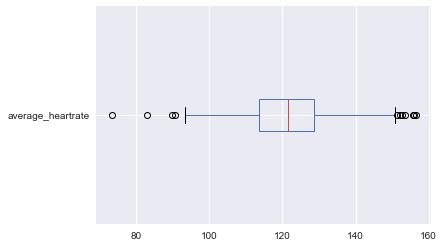

In [3]:
strava['average_heartrate'].plot.box(vert=False)

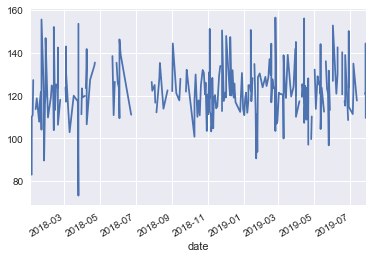

In [4]:
strava['average_heartrate'].plot()

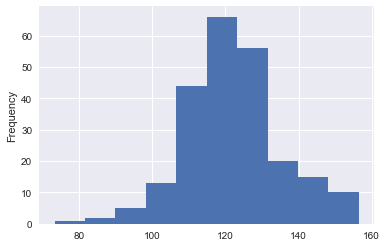

In [5]:
strava['average_heartrate'].plot.hist()

In [6]:
strava.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 268 entries, 2018-01-02 20:47:51+00:00 to 2019-07-27 23:55:13+00:00
Data columns (total 10 columns):
average_heartrate    232 non-null float64
average_temp         204 non-null float64
average_watts        254 non-null float64
device_watts         260 non-null object
distance             268 non-null float64
elapsed_time         268 non-null int64
elevation_gain       268 non-null object
kudos                268 non-null int64
moving_time          268 non-null int64
workout_type         268 non-null object
dtypes: float64(4), int64(3), object(3)
memory usage: 23.0+ KB


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [7]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [8]:
strava.join(cheetah, how='inner' )

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
    
* Some of the rides are designated as "Race" in the `workout_type` field, these are where I am racing and you might expect that these would be the most challenging rides.  Normalised Power (NP) is a good measure of how hard a ride is.  Explore the values of `NP` for races vs the overall set of rides to see if this hypothesis is supported (use graphs and summary statistics).  Are races more challenging than rides in general? 

* It is useful to see a summary of rides over the year. Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate another summary graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


* Joined the two dataframes using inner join : Joins the cheetah and strava dataframe for common data present in both the dataframes. Here the dataframes are joined on the basis of data present in strava.

In [135]:
joined_df=(strava.join(cheetah, how='inner' ))
joined_df.shape

(243, 372)

In [136]:
joined_df = joined_df.copy()
p = joined_df.index.values
joined_df.insert( 0, column="Date",value = p)
joined_df

,Date,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,2018-01-27 19:39:49,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,2018-01-27 20:01:32,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-01-31 21:13:34+00:00,2018-01-31 21:13:34,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-05 21:06:42+00:00,2018-02-05 21:06:42,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,2018-02-07 06:59:05,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,2019-07-19 20:22:49,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,2019-07-26 20:12:56,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,2019-07-27 20:42:59,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,2019-07-27 21:47:24,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


# 1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides

In [10]:
#Check for unique values in the device_watts field
joined_df['device_watts'].unique()

array([True, False, nan], dtype=object)

Approach: 
As we can see there are NaN values also included in the dataframe column device_watts, I have used two method to remove the rides with no measured power. One is to simply select the data for 'True' entries. Secondly, I have cleaned the dataframe with respect to just the device_watts column by using dropna to drop the NaN values. Then I have used this cleaned dataframe to filter out the 'False' entries for device_watts

In [11]:
#Approach one
true_df= joined_df[joined_df['device_watts'] == True]
true_df.shape

(205, 372)

In [12]:
#Approach two
cleaned_df = joined_df.dropna(subset=['device_watts'])
cleaned_df.shape

(239, 372)

In [13]:
onlytrue_df= cleaned_df[cleaned_df['device_watts'] == False]

In [14]:
onlytrue_df.shape

(34, 372)

# 2. Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed?

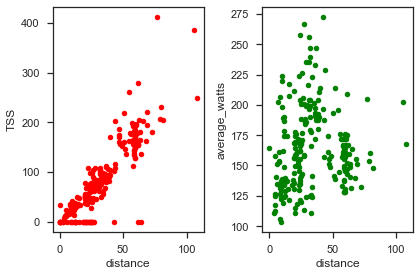

In [207]:
fig, (ax1, ax2) = plt.subplots(1, 2)

joined_df.plot(kind='scatter',x='distance',y='TSS', ax=ax1 ,color='red')
joined_df.plot(kind='scatter',x='distance',y='average_watts', ax=ax2 ,color='green')
fig.tight_layout()

* There is almost a linear relation between Distance and TSS. As the distance increases the TSS also increases. Whereas when we look at distance and average_watts.

Text(0.5, 0, 'time in secs')

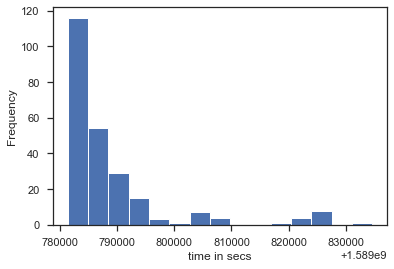

In [158]:
pd.to_timedelta(joined_df['time']).dt.total_seconds().plot.hist(bins=15)
plt.xlabel('time in secs')

* When time is looked at in seconds it seems that the graph is right skewed

In [18]:
joined_df.skew(axis=0, skipna=True)

average_heartrate      0.135448
average_temp          -0.138575
average_watts          0.721977
device_watts          -2.061194
distance               0.616377
                         ...   
Rest HF                0.000000
HRV Recovery Points    0.000000
NP                    -1.486573
IF                    -1.486573
TSS                    1.016523
Length: 367, dtype: float64

Observations: From the skew() in-built function we get the skewness of the data over a requested axis wherein a value closer to 0 represents a normal distribution. Here axis=0 uses index for calculating the skewness.

In [19]:
joined_df['distance'].corr(joined_df['moving_time'])

0.9192349053747003

In [20]:
joined_df['NP'].corr(joined_df['average_heartrate'])

0.3751988307028401

* Heatmap : A rectangular color encoded matrix which shows the correlation between variables on a scale of 1 to -1. Wherein 1 represents high correlation and -1 the least. Dark blue colors here represent higher correlation.

In [21]:
import seaborn as sns
from pandas import DataFrame

In [38]:
indexes = joined_df[['distance','moving_time','Average Speed', 'Average Heart Rate','Average Power','NP', 'elevation_gain', 'TSS']]

[Text(0.5, 0, 'distance'),
 Text(1.5, 0, 'moving_time'),
 Text(2.5, 0, 'Average Speed'),
 Text(3.5, 0, 'Average Heart Rate'),
 Text(4.5, 0, 'Average Power'),
 Text(5.5, 0, 'NP'),
 Text(6.5, 0, 'TSS')]

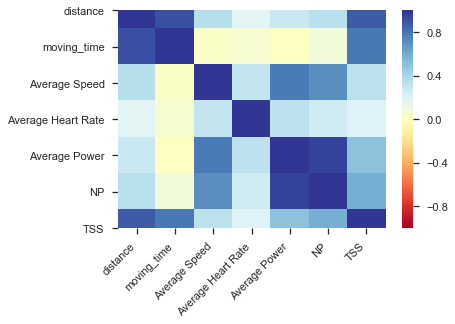

In [39]:
corr =indexes.corr()
ax = sns.heatmap(corr, vmin = -1,vmax=1, cmap='RdYlBu')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

1. Distance is highly related to TSS and moving_time which is represented by darked shades of blue. It is obvious that as the distance increases the moving_time increases and it has an impact on Training Stress Score. Higher the TSS value indicates a higher difficulty level of the workout_type.  
2. Average Speed has a high relation to Average Power which is then followed by NP. While the distance has almost a value of 0.4 
3. Lower relation is observed in Average speed, Average Power and moving_time. This reflects that moving_time of a ride doesn't have a much impact on the average speed or power of the ride.
4. One more highly evident relation is between Average Power and NP.

In [24]:
indexes.skew(axis=0, skipna=True)

distance              0.616377
moving_time           0.612342
Average Speed        -0.987502
Average Heart Rate   -1.965619
Average Power        -1.063853
NP                   -1.486573
dtype: float64

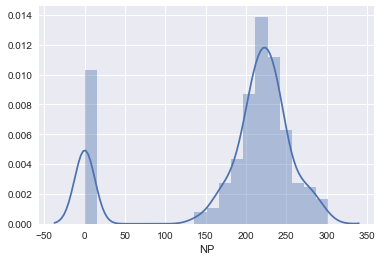

In [27]:
p = sns.distplot(joined_df.NP)
plt.show()

# 4. Some of the rides are designated as "Race" in the workout_type field, these are where I am racing and you might expect that these would be the most challenging rides. Normalised Power (NP) is a good measure of how hard a ride is. Explore the values of NP for races vs the overall set of rides to see if this hypothesis is supported (use graphs and summary statistics). Are races more challenging than rides in general?

In [159]:
joined_df['workout_type'].unique()

array(['Ride', 'Race', 'Workout'], dtype=object)

In [160]:
joined_df.groupby('workout_type').median()

,average_heartrate,average_temp,average_watts,distance,elapsed_time,kudos,moving_time,axPower,aPower Relative Intensity,aBikeScore,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
workout_type,,,,,,,,,,,,,,,,,,,,,
Race,145.10,14.0,215.50,32.10,54.0,16.0,54.0,234.7840,0.876062,73.69025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257.1700,0.959591,84.62545
Ride,119.95,15.0,151.35,26.15,93.5,10.0,81.5,189.9235,0.708670,48.39475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.3445,0.788600,57.35585
Workout,125.10,11.0,185.70,25.50,60.0,7.0,60.0,212.9850,0.794720,67.12280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.1090,0.836229,73.74900


* If the rides are grouped by the 'workout_type' field and median of those values is taken it is evident Normalized power of the workout_type Race is the highest. It can be considered as an indicator of how challenging the workout type is. 

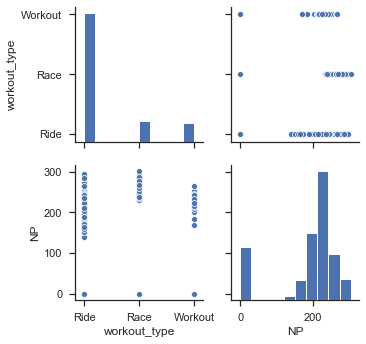

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
pp = sns.pairplot(joined_df, vars=['workout_type', 'NP'])

plt.show()

In [178]:
races_df = joined_df[joined_df['workout_type'] == 'Race']
exclude_race_df= joined_df[joined_df['workout_type'] != 'Race']

In [173]:
race_avh= races_df['average_heartrate'].mean()
exclude_race_avh= exclude_race_df['average_heartrate'].mean()

df= pd.DataFrame({'label':['Races','Excluding Races'], 'val':[race_avh,exclude_race_avh]})

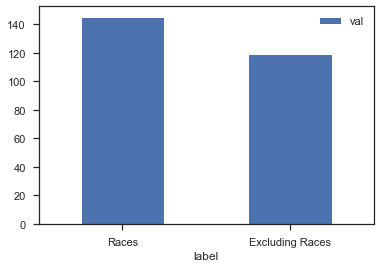

In [174]:
ax = df.plot.bar(x='label', y='val', rot=0)

In [175]:
surplus = {(race_avh-exclude_race_avh)/race_avh * 100}
print(surplus)

{17.962568342807046}


Observation : From the above bar plot it is evident that the average heart rate is higher (17.96%) when the activity type is Races and lower if not in Races.

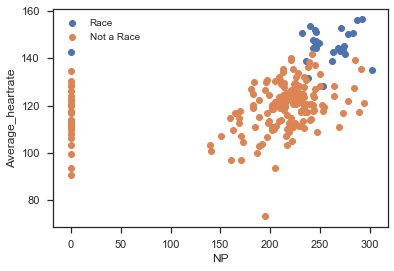

In [197]:
#joined_df.plot(kind='scatter',x='distance',y='average_watts' ,color='green')
import matplotlib.pyplot as plt

plt.scatter(races_df['NP'], races_df['average_heartrate'],  label='Race')
plt.scatter(exclude_race_df['NP'], exclude_race_df['average_heartrate'], label='Not a Race')
plt.legend(scatterpoints=1,loc='upper left', ncol=1, fontsize=10)
plt.xlabel('NP')
plt.ylabel('Average_heartrate')
plt.show()

* From the scatter plot we can observe that the average_heartrate for workout_type Race is higher as compared to other workout types. This could be seen as a indicator of Races being challenging

# 5. It is useful to see a summary of rides over the year. Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the sum of the Training Stress Score and the average of the Average Speed to generate an overall summary of activity.

In [137]:
ride_summary=joined_df.groupby(['Date', 'workout_type', 'TSS','Average Speed']).sum()

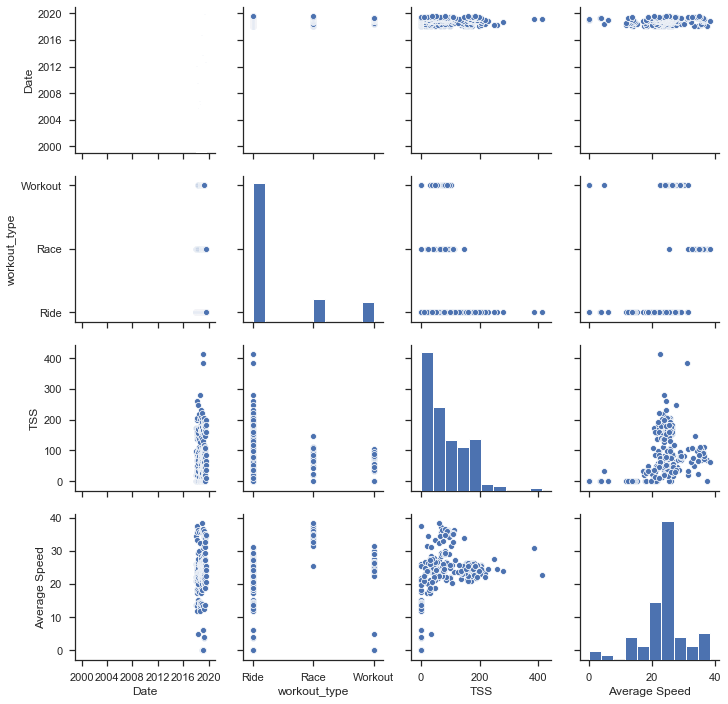

In [138]:
rs = sns.pairplot(joined_df, vars=['Date', 'workout_type', 'TSS','Average Speed'])

In [220]:
month_df=joined_df.groupby([joined_df.index.month]).sum()
month_df.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

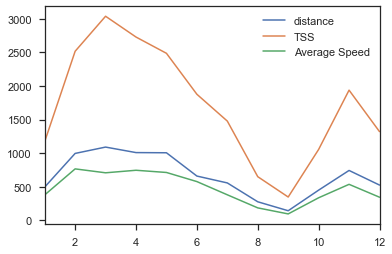

In [219]:
month_df[['distance','TSS','Average Speed']].plot()

Observation: From the plot it seems that the highest activity was between February and April

# What leads to more kudos? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe.

In [237]:
corr1 = joined_df.corr()
corr1.kudos

average_heartrate      0.372500
average_temp          -0.019307
average_watts          0.264645
distance               0.743757
elapsed_time           0.266218
                         ...   
Rest HF                     NaN
HRV Recovery Points         NaN
NP                     0.241040
IF                     0.241040
TSS                    0.626638
Name: kudos, Length: 366, dtype: float64

In [233]:
indexes = indexes

,distance,moving_time,Average Speed,Average Heart Rate,Average Power,NP,TSS
distance,1.000000,0.919235,0.354813,0.184272,0.283746,0.347391,0.880188
moving_time,0.919235,1.000000,0.024566,0.057413,0.011593,0.093727,0.781805
Average Speed,0.354813,0.024566,1.000000,0.316336,0.775712,0.707347,0.340263
Average Heart Rate,0.184272,0.057413,0.316336,1.000000,0.335747,0.264890,0.209751
Average Power,0.283746,0.011593,0.775712,0.335747,1.000000,0.955567,0.500283
NP,0.347391,0.093727,0.707347,0.264890,0.955567,1.000000,0.591343
TSS,0.880188,0.781805,0.340263,0.209751,0.500283,0.591343,1.000000
